<a href="https://colab.research.google.com/github/Kazureee/Python-Lessons/blob/main/DBSCAN_AND_K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activity 5: Exploring and Comparing DBSCAN and K-Means Clustering

The dataset comprises earthquake records pertaining to Turkey and its surrounding regions. It exclusively encompasses earthquakes occurring within the timeframe spanning from September 1994 to September 2023, with magnitudes exceeding 3.0 on the Richter scale.



In [47]:
import pandas as pd  # For data manipulation using DataFrames
import matplotlib.pyplot as plt # For data visualization
import numpy as np  # For numerical operations
from sklearn.preprocessing import StandardScaler # For feature scaling (standardization)
from sklearn.cluster import DBSCAN # For DBSCAN clustering
import seaborn as sns  # For enhanced data visualization

# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Earthquake_data_dataset.csv')
print(df.columns)

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'tsunami', 'sig',
       'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'country'],
      dtype='object')


In [49]:
# Check for extreme values
print(df[['longitude', 'latitude']].describe())

        longitude    latitude
count  782.000000  782.000000
mean    52.609199    3.538100
std    117.898886   27.303429
min   -179.968000  -61.848400
25%    -71.668050  -14.595600
50%    109.426000   -2.572500
75%    148.941000   24.654500
max    179.662000   71.631200


In [50]:
# Remove outliers
df = df[(df['latitude'] > -90) & (df['latitude'] < 90) & (df['longitude'] > -180) & (df['longitude'] < 180)]

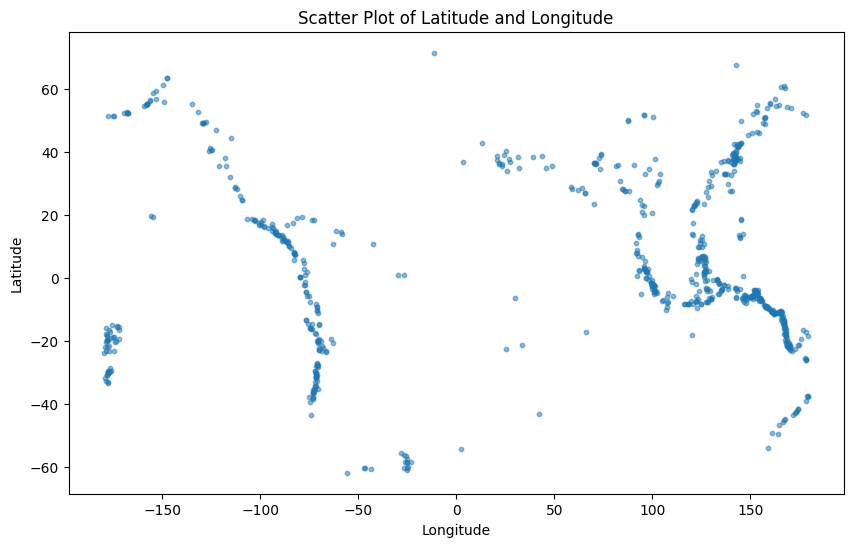

In [51]:
# Visualize the dataset using scatter plot where "longitude" and "latitude" columns will be utilized
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], s=10, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude and Longitude")
plt.show()

In [52]:
# Extract latitude and longitude
coordinates = df[['latitude', 'longitude']]

In [53]:
# Normalize coordinates
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

In [54]:
# Display the extracted data
print(pd.DataFrame(scaled_coordinates, columns=['latitude', 'longitude']).head())

   latitude  longitude
0 -0.488691   0.908026
1 -0.311296   0.408482
2 -0.864507  -1.960180
3 -0.836690  -1.907414
4 -1.067688   1.066585


In [55]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjusted eps for better clustering
labels = dbscan.fit_predict(scaled_coordinates)

In [56]:
# Add cluster labels to the original dataset
df['cluster'] = labels

In [57]:
# Display the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 6
Estimated number of noise points: 12


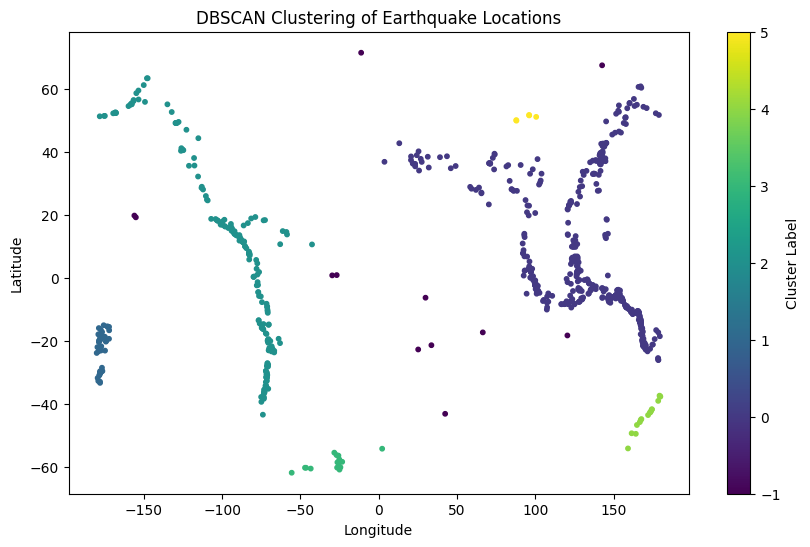

In [58]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], cmap='viridis', c=df['cluster'], marker='o', s=10)
plt.title('DBSCAN Clustering of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

In [59]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_coordinates)
df['cluster'] = kmeans_labels

In [60]:
# Inverse transform the cluster centers
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the cluster centers
print("Cluster Centers (Original Scale):\n", original_centers)

Cluster Centers (Original Scale):
 [[  28.58323243 -112.08312613]
 [  37.60761964  113.39516012]
 [ -56.948135    -18.52564   ]
 [  -7.77545527  139.81865499]
 [ -21.63543409 -107.38334167]]


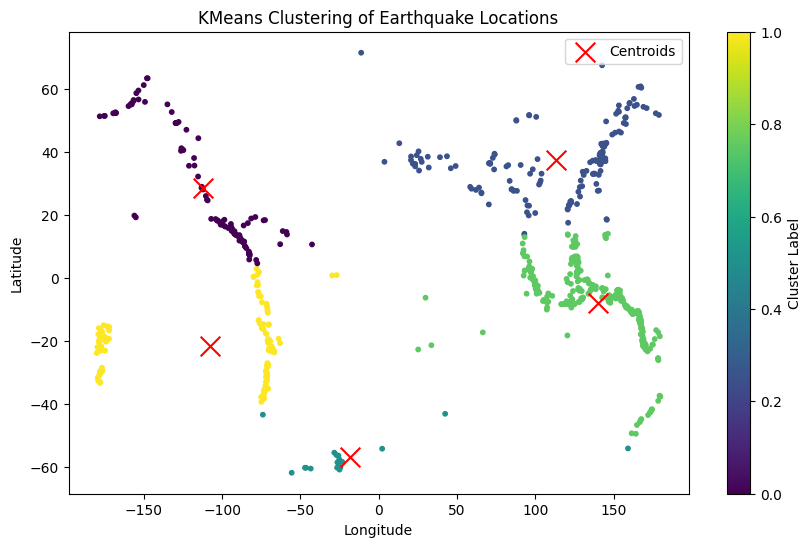

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', marker='o', s=10)
plt.scatter(original_centers[:, 1], original_centers[:, 0], c='red', marker='x', s=200, label='Centroids')
plt.title('KMeans Clustering of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()